# Problem 1

Given a number `n`, write a python function to check if it is palindrome or not. 
A number is said to be palindrome if reverse of the number is it self.

### Example

```python

>>> palindrome(n=3456543)
True

>>> palindrome(n=543)

False

```

### Solution:

In [1]:
def palindrome(n):
    return str(n) == str(n)[::-1]

In [2]:
print(palindrome(n=3456543))
print(palindrome(n=543))

True
False


# Problem 2
Given a number `n`, write a python function that return a numpy array with all primes smaller than or equal to `n`.<br>
Hint: see [this](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes) algorithm
### Example

```python

>>> primes(n=100)
array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

>>> primes(n=235)
array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233])

```

### Solution:

In [6]:
import numpy as np
def primes(n):
    prime = np.arange(n+1)
    mask = np.ones(n + 1, dtype=np.bool)
    mask[:1] = False
    for p in range(2, n + 1):
        if mask[p]:
            mask[2*p :: p] = False
    return prime[mask][1:]

In [7]:
print(primes(n=100))
print(primes(n=235))

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233]


# Problem 3
Given de `poke` DataFrame answer the following questions

* Which pokemon type is the most frequent?
* Which pokemon type is the strongest and which the weakest? (according to total stats)
* What are the 5 strongest pokemon among the common pokemon?
* Which started pokemon is the strongest?
* Which pokemon generation has the biggest average total stats?
* How strong is Pikachu among pokemon of the same type?
* There are any correlation between the attributes?

In [4]:
import pandas as pd

poke = pd.read_csv('https://raw.githubusercontent.com/shpotes/ML-biocomp/master/notebooks/lectures/data/Pokemon.csv')

poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
poke["Type 1"].mode()
poke["Type 2"].mode()
pd.concat([poke["Type 1"],poke["Type 2"]], axis=0).mode()

0    Water
dtype: object

In [6]:
#Strongest Type
poke.groupby("Type 1").mean().sort_values(by="Total", ascending = False)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Steel,442.851852,487.703704,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852,0.148148
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Psychic,380.807018,475.947368,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,3.385965,0.245614
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Rock,392.727273,453.750000,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,0.090909
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [7]:
#Top 5 Non-legendary
poke[poke.Legendary != True].sort_values(by="Total", ascending=False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False


In [8]:
#Strongest Starter
poke[poke.Legendary != True].drop_duplicates("#",keep="first").groupby("Generation").head(9).sort_values("Total",ascending=False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
282,260,Swampert,Water,Ground,535,100,110,90,85,90,60,3,False
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
723,655,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False
171,157,Typhlosion,Fire,NaN,534,78,84,78,109,85,100,2,False


In [9]:
# Strongest Generation
poke.groupby("Generation").mean().sort_values("Total",ascending=False)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,,
4,442.446281,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843,0.107438
6,688.012195,436.378049,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024,0.097561
3,321.968750,436.225000,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000,0.112500
5,574.272727,434.987879,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788,0.090909
1,75.819277,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,0.036145
2,202.283019,418.283019,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321,0.047170


In [10]:
# Pikachu Weakness
poke[(poke["Type 1"] == "Electric")].sort_values("Total")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
186,172,Pichu,Electric,NaN,205,20,40,15,35,35,60,2,False
448,403,Shinx,Electric,NaN,263,45,65,34,40,34,45,4,False
663,602,Tynamo,Electric,NaN,275,35,55,40,45,40,60,5,False
193,179,Mareep,Electric,NaN,280,55,40,40,65,45,35,2,False
764,694,Helioptile,Electric,Normal,289,44,38,33,61,43,70,6,False
581,522,Blitzle,Electric,NaN,295,45,60,32,50,32,76,5,False
337,309,Electrike,Electric,NaN,295,40,45,40,65,40,65,3,False
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
88,81,Magnemite,Electric,Steel,325,25,35,70,95,55,45,1,False
108,100,Voltorb,Electric,NaN,330,40,30,50,55,55,100,1,False


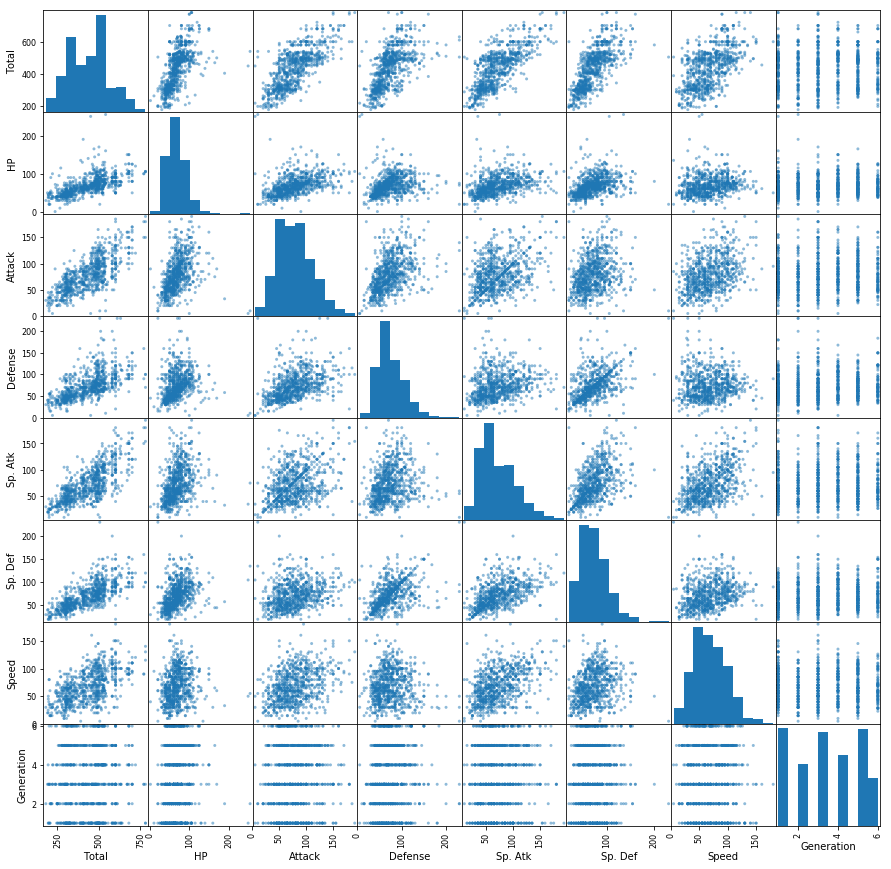

In [12]:
# Correlations
pd.plotting.scatter_matrix(poke.drop(poke.columns[[0,1,2,3,-1]], axis=1), figsize=(15,15));